European Central Bank (ECB) API with Python
=====

## Data on Eurozone countries

-----

*February 2026*<br>
*@bd_econ*

ECB API Documentation is [here](https://data.ecb.europa.eu/help/api/overview)

This example requests data from the ECB's SDMX API using Python's `requests` library with CSV output. The ECB provides data on interest rates, exchange rates, monetary aggregates, and more.

You can browse available datasets using the [ECB Data Portal](https://data.ecb.europa.eu/).

In [1]:
import requests
import pandas as pd
import io

## Parameters/Settings

Browse datasets on the [ECB Data Portal](https://data.ecb.europa.eu/). The API base URL is:

```
https://data-api.ecb.europa.eu/service/data/{dataflow}/{key}
```

The `key` is a dot-separated string of dimension values. Use `+` to request multiple values for the same dimension.

### Example 1: Government Bond Yields

Monthly 10-year government bond yields for selected Eurozone countries, since 2012.

In [2]:
# List of Eurozone countries
c_list = ['DE', 'FR', 'IT', 'ES', 'PT', 'GR', 'NL', 'BE', 'AT', 'IE']

# IRS = Interest Rate Statistics
# Key: Freq.Country.Type.TransType.Maturity.Sector.Currency.BusCov.FVType
key = f"M.{'+'.join(c_list)}.L.L40.CI.0000.EUR.N.Z"

url = f'https://data-api.ecb.europa.eu/service/data/IRS/{key}'
params = {'startPeriod': '2012', 'detail': 'dataonly'}
headers = {'Accept': 'text/csv'}

r = requests.get(url, params=params, headers=headers)
print(f'Status: {r.status_code}')

Status: 200


## Pandas DataFrame

The CSV response has columns including `REF_AREA`, `TIME_PERIOD`, and `OBS_VALUE`. Pivot to get countries as columns.

In [3]:
df = pd.read_csv(io.StringIO(r.text))
data = df.set_index(['TIME_PERIOD', 'REF_AREA'])['OBS_VALUE'].unstack()
data.index = pd.to_datetime(data.index)
data.index.name = ''
data.columns.name = ''
data.tail()

,AT,BE,DE,ES,FR,GR,IE,IT,NL,PT
,,,,,,,,,,
2025-09-01,3.0244,3.26,2.693,3.262,3.51,3.39,2.9460,3.559,2.883,3.133
2025-10-01,2.9352,3.19,2.617,3.147,3.44,3.30,2.8707,3.442,2.794,3.021
2025-11-01,2.9705,3.20,2.657,3.173,3.44,3.30,2.8967,3.459,2.831,3.025
2025-12-01,3.0974,3.32,2.813,3.271,3.56,3.44,3.0132,3.552,2.968,3.146
2026-01-01,3.0763,3.36,2.807,3.268,3.53,3.43,3.0611,3.492,2.940,3.185


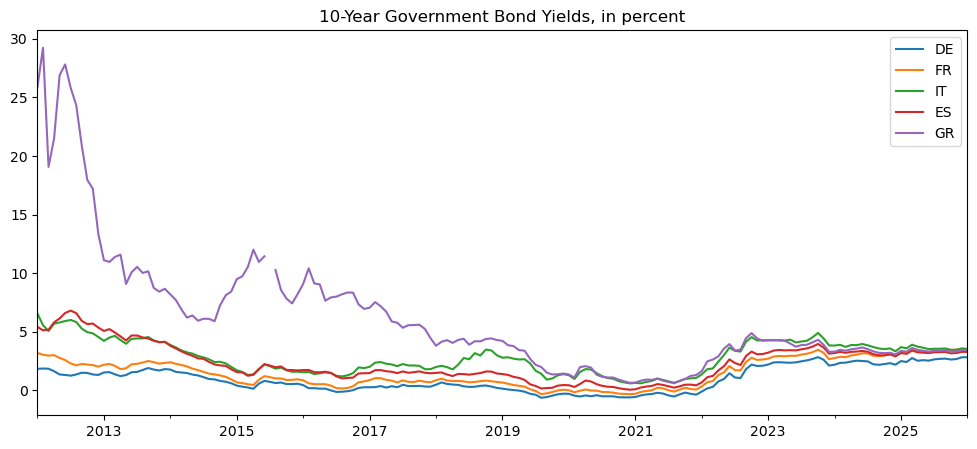

In [4]:
%matplotlib inline
data[['DE', 'FR', 'IT', 'ES', 'GR']].plot(
    title='10-Year Government Bond Yields, in percent',
    figsize=(12, 5));

### Example 2: EUR/USD Exchange Rate

Monthly EUR/USD exchange rate from the EXR (Exchange Rates) dataflow.

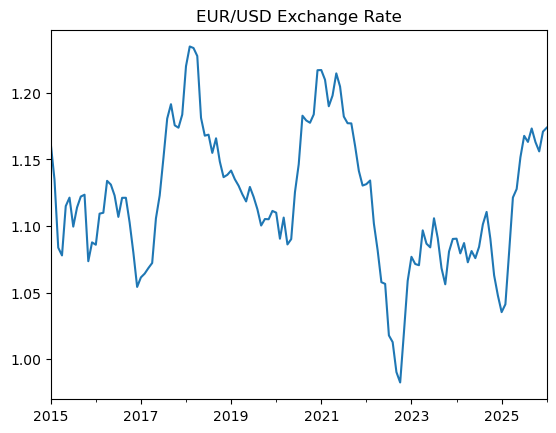

In [5]:
url = 'https://data-api.ecb.europa.eu/service/data/EXR/M.USD.EUR.SP00.A'
params = {'startPeriod': '2015', 'detail': 'dataonly'}
headers = {'Accept': 'text/csv'}

r = requests.get(url, params=params, headers=headers)
df = pd.read_csv(io.StringIO(r.text))
data = df.set_index('TIME_PERIOD')['OBS_VALUE']
data.index = pd.to_datetime(data.index)
data.index.name = ''
data.plot(title='EUR/USD Exchange Rate', legend=False);

### Example 3: Unemployment Rate (AMECO)

Annual unemployment rates from the AMECO macroeconomic database.

Note: the AMECO dataflow uses 3-letter country codes (DEU, FRA, etc.) and names its country column `AME_REF_AREA` rather than `REF_AREA`.

In [6]:
countries = 'DEU+FRA+ITA+ESP+PRT+GRC+NLD+BEL+AUT+IRL'
key = f'A.{countries}.1.0.0.0.ZUTN'

url = f'https://data-api.ecb.europa.eu/service/data/AME/{key}'
params = {'startPeriod': '2015', 'detail': 'dataonly'}
headers = {'Accept': 'text/csv'}

r = requests.get(url, params=params, headers=headers)
df = pd.read_csv(io.StringIO(r.text))
data = df.set_index(['TIME_PERIOD', 'AME_REF_AREA'])['OBS_VALUE'].unstack()
data.index.name = ''
data.columns.name = ''
data.tail()

,AUT,BEL,DEU,ESP,FRA,GRC,IRL,ITA,NLD,PRT
,,,,,,,,,,
2023,5.1,5.5,3.1,12.2,7.3,11.1,4.3,7.7,3.6,6.5
2024,5.2,5.7,3.4,11.4,7.4,10.1,4.3,6.5,3.7,6.5
2025,5.6,6.0,3.6,10.4,7.6,9.3,4.6,6.2,3.9,6.3
2026,5.5,6.2,3.5,9.8,8.0,8.6,4.7,6.1,4.1,6.2
2027,5.3,6.1,3.3,9.6,8.2,8.2,4.7,6.0,4.3,6.1
